In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
cust = pd.read_csv(r"C:\Users\ifixthat\Downloads\Compressed\New folder (3)\Case Study 1 - Retail Case Study\Customer.csv")
cust.head(2)

,customer_Id,DOB,Gender,city_code
0,268408,02-01-1970,M,4.0
1,269696,07-01-1970,F,8.0


In [8]:
pci = pd.read_csv(r"C:\Users\ifixthat\Downloads\Compressed\New folder (3)\Case Study 1 - Retail Case Study\prod_cat_info.csv")
pci.head(2)

,prod_cat_code,prod_cat,prod_sub_cat_code,prod_subcat
0,1,Clothing,4,Mens
1,1,Clothing,1,Women


In [9]:
trans = pd.read_csv(r"C:\Users\ifixthat\Downloads\Compressed\New folder (3)\Case Study 1 - Retail Case Study\Transactions.csv")
trans.head(2)

,transaction_id,cust_id,tran_date,prod_subcat_code,prod_cat_code,Qty,Rate,Tax,total_amt,Store_type
0,80712190438,270351,28-02-2014,1,1,-5,-772,405.300,-4265.300,e-Shop
1,29258453508,270384,27-02-2014,5,3,-5,-1497,785.925,-8270.925,e-Shop


### 1. Merge the datasets Customers, Product Hierarchy and Transactions as Customer_Final. Ensure to keep all customers who have done transactions with us and select the join type accordingly.


In [10]:
customer_final = cust.merge(trans, how = 'inner',left_on = 'customer_Id' ,
                            right_on = 'cust_id' ).merge(pci , left_on = ['prod_subcat_code','prod_cat_code'] 
                                                             ,right_on = ['prod_sub_cat_code','prod_cat_code']  )
customer_final.head(2)

,customer_Id,DOB,Gender,city_code,transaction_id,cust_id,tran_date,prod_subcat_code,prod_cat_code,Qty,Rate,Tax,total_amt,Store_type,prod_cat,prod_sub_cat_code,prod_subcat
0,268408,02-01-1970,M,4.0,87243835584,268408,13-01-2014,7,5,5,187,98.175,1033.175,TeleShop,Books,7,Fiction
1,275152,16-01-1970,M,4.0,73109425404,275152,25-03-2011,7,5,2,464,97.440,1025.440,e-Shop,Books,7,Fiction


In [11]:
customer_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23053 entries, 0 to 23052
Data columns (total 17 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   customer_Id        23053 non-null  int64  
 1   DOB                23053 non-null  object 
 2   Gender             23044 non-null  object 
 3   city_code          23045 non-null  float64
 4   transaction_id     23053 non-null  int64  
 5   cust_id            23053 non-null  int64  
 6   tran_date          23053 non-null  object 
 7   prod_subcat_code   23053 non-null  int64  
 8   prod_cat_code      23053 non-null  int64  
 9   Qty                23053 non-null  int64  
 10  Rate               23053 non-null  int64  
 11  Tax                23053 non-null  float64
 12  total_amt          23053 non-null  float64
 13  Store_type         23053 non-null  object 
 14  prod_cat           23053 non-null  object 
 15  prod_sub_cat_code  23053 non-null  int64  
 16  prod_subcat        230

In [12]:
cust.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5647 entries, 0 to 5646
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   customer_Id  5647 non-null   int64  
 1   DOB          5647 non-null   object 
 2   Gender       5645 non-null   object 
 3   city_code    5645 non-null   float64
dtypes: float64(1), int64(1), object(2)
memory usage: 176.6+ KB


In [13]:
pci.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23 entries, 0 to 22
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   prod_cat_code      23 non-null     int64 
 1   prod_cat           23 non-null     object
 2   prod_sub_cat_code  23 non-null     int64 
 3   prod_subcat        23 non-null     object
dtypes: int64(2), object(2)
memory usage: 864.0+ bytes


In [14]:
trans.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23053 entries, 0 to 23052
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   transaction_id    23053 non-null  int64  
 1   cust_id           23053 non-null  int64  
 2   tran_date         23053 non-null  object 
 3   prod_subcat_code  23053 non-null  int64  
 4   prod_cat_code     23053 non-null  int64  
 5   Qty               23053 non-null  int64  
 6   Rate              23053 non-null  int64  
 7   Tax               23053 non-null  float64
 8   total_amt         23053 non-null  float64
 9   Store_type        23053 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.8+ MB


#### 2. Prepare a summary report for the merged data set.

 **a. Get the column names and their corresponding data types.**


In [15]:
customer_final.dtypes

customer_Id            int64
DOB                   object
Gender                object
city_code            float64
transaction_id         int64
cust_id                int64
tran_date             object
prod_subcat_code       int64
prod_cat_code          int64
Qty                    int64
Rate                   int64
Tax                  float64
total_amt            float64
Store_type            object
prod_cat              object
prod_sub_cat_code      int64
prod_subcat           object
dtype: object

 **b. Top/Bottom 10 observations**

In [16]:
customer_final.head(10)

,customer_Id,DOB,Gender,city_code,transaction_id,cust_id,tran_date,prod_subcat_code,prod_cat_code,Qty,Rate,Tax,total_amt,Store_type,prod_cat,prod_sub_cat_code,prod_subcat
0,268408,02-01-1970,M,4.0,87243835584,268408,13-01-2014,7,5,5,187,98.175,1033.175,TeleShop,Books,7,Fiction
1,275152,16-01-1970,M,4.0,73109425404,275152,25-03-2011,7,5,2,464,97.440,1025.440,e-Shop,Books,7,Fiction
2,275034,18-01-1970,F,4.0,64777271023,275034,23-05-2011,7,5,2,197,41.370,435.370,Flagship store,Books,7,Fiction
3,270829,22-01-1970,F,8.0,87174343938,270829,9/12/2013,7,5,4,1141,479.220,5043.220,e-Shop,Books,7,Fiction
4,267657,29-01-1970,F,7.0,76242744953,267657,23-05-2013,7,5,4,1020,428.400,4508.400,e-Shop,Books,7,Fiction
5,274630,01-02-1970,M,4.0,78357345891,274630,11/4/2012,7,5,1,646,67.830,713.830,TeleShop,Books,7,Fiction
6,273541,01-02-1970,M,4.0,23916816961,273541,9/2/2013,7,5,4,410,172.200,1812.200,e-Shop,Books,7,Fiction
7,269008,13-02-1970,F,6.0,35560569829,269008,9/3/2013,7,5,1,1441,151.305,1592.305,e-Shop,Books,7,Fiction
8,269008,13-02-1970,F,6.0,94033312891,269008,26-04-2012,7,5,5,746,391.650,4121.650,MBR,Books,7,Fiction
9,267199,14-02-1970,NaN,2.0,56749259881,267199,11/1/2012,7,5,4,1049,440.580,4636.580,MBR,Books,7,Fiction


**c. “Five-number summary” for continuous variables (min, Q1, median, Q3 and max)**

In [17]:
a = customer_final.describe()

In [18]:
a.loc[['min','max','25%','75%','mean'], : :  ]

,customer_Id,city_code,transaction_id,cust_id,prod_subcat_code,prod_cat_code,Qty,Rate,Tax,total_amt,prod_sub_cat_code
min,266783.000000,1.000000,3.268991e+06,266783.000000,1.000000,1.000000,-5.000000,-1499.000000,7.350000,-8270.925000,1.000000
max,275265.000000,10.000000,9.998755e+10,275265.000000,12.000000,6.000000,5.000000,1500.000000,787.500000,8287.500000,12.000000
25%,268935.000000,3.000000,2.493864e+10,268935.000000,3.000000,2.000000,1.000000,312.000000,98.280000,762.450000,3.000000
75%,273114.000000,8.000000,7.533000e+10,273114.000000,10.000000,5.000000,4.000000,1109.000000,365.715000,3569.150000,10.000000
mean,271021.746497,5.482534,5.007348e+10,271021.746497,6.149091,3.763632,2.432395,636.369713,248.667192,2107.308002,6.149091


### ***d. Frequency tables for all the categorical variables***

In [19]:
##### Converting DOB & Transaction date into proper datetime format

In [20]:
customer_final['DOB'] = pd.to_datetime(customer_final.DOB ,  )
customer_final.DOB


C:\Users\ifixthat\AppData\Local\Temp\ipykernel_8844\392363837.py:1: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  customer_final['DOB'] = pd.to_datetime(customer_final.DOB  )


0       1970-02-01
1       1970-01-16
2       1970-01-18
3       1970-01-22
4       1970-01-29
           ...    
23048   1992-04-12
23049   1992-09-12
23050   1992-12-15
23051   1992-12-15
23052   1992-12-15
Name: DOB, Length: 23053, dtype: datetime64[ns]

In [21]:
customer_final['tran_date'] = pd.to_datetime(customer_final.tran_date)
customer_final.tran_date

C:\Users\ifixthat\AppData\Local\Temp\ipykernel_8844\1902540995.py:1: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  customer_final['tran_date'] = pd.to_datetime(customer_final.tran_date)


0       2014-01-13
1       2011-03-25
2       2011-05-23
3       2013-09-12
4       2013-05-23
           ...    
23048   2012-10-10
23049   2013-08-17
23050   2012-01-02
23051   2011-01-31
23052   2011-01-26
Name: tran_date, Length: 23053, dtype: datetime64[ns]

In [22]:
cat_var = customer_final.select_dtypes('object')
cat_var.describe()

,Gender,Store_type,prod_cat,prod_subcat
count,23044,23053,23053,23053
unique,2,4,6,18
top,M,e-Shop,Books,Women
freq,11811,9311,6069,3048


### ***3. Generate histograms for all continuous variables and frequency bars for categorical variables.***

In [23]:
customer_final


,customer_Id,DOB,Gender,city_code,transaction_id,cust_id,tran_date,prod_subcat_code,prod_cat_code,Qty,Rate,Tax,total_amt,Store_type,prod_cat,prod_sub_cat_code,prod_subcat
0,268408,1970-02-01,M,4.0,87243835584,268408,2014-01-13,7,5,5,187,98.175,1033.175,TeleShop,Books,7,Fiction
1,275152,1970-01-16,M,4.0,73109425404,275152,2011-03-25,7,5,2,464,97.440,1025.440,e-Shop,Books,7,Fiction
2,275034,1970-01-18,F,4.0,64777271023,275034,2011-05-23,7,5,2,197,41.370,435.370,Flagship store,Books,7,Fiction
3,270829,1970-01-22,F,8.0,87174343938,270829,2013-09-12,7,5,4,1141,479.220,5043.220,e-Shop,Books,7,Fiction
4,267657,1970-01-29,F,7.0,76242744953,267657,2013-05-23,7,5,4,1020,428.400,4508.400,e-Shop,Books,7,Fiction
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23048,267812,1992-04-12,F,1.0,63540378797,267812,2012-10-10,10,5,3,224,70.560,742.560,TeleShop,Books,10,Non-Fiction
23049,274618,1992-09-12,F,7.0,71793203305,274618,2013-08-17,10,5,4,691,290.220,3054.220,Flagship store,Books,10,Non-Fiction
23050,268097,1992-12-15,F,7.0,91217108818,268097,2012-01-02,10,5,2,411,86.310,908.310,e-Shop,Books,10,Non-Fiction
23051,268097,1992-12-15,F,7.0,90114483354,268097,2011-01-31,10,5,-4,-1408,591.360,-6223.360,e-Shop,Books,10,Non-Fiction


In [24]:
def contvar(x):
     
        x.hist()
        plt.title('Frequency of '+ x.name )
        plt.figure(figsize = (10,6))
        plt.show()
    

In [25]:
cont_var.apply(contvar)

NameError: name 'cont_var' is not defined

In [26]:
def catvar(x):
    sns.histplot(x)
    
    plt.figure(figsize = (14,8))

    plt.show()

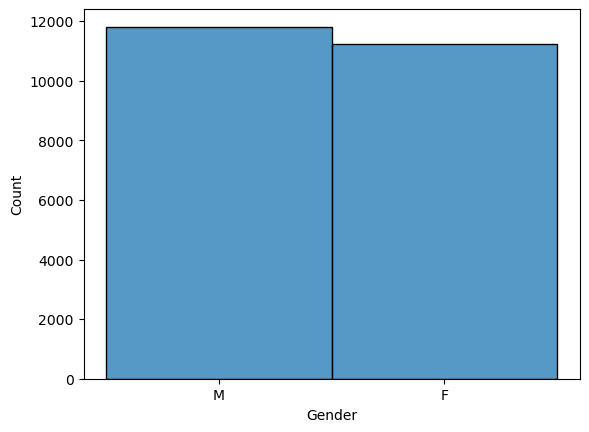

<Figure size 1400x800 with 0 Axes>

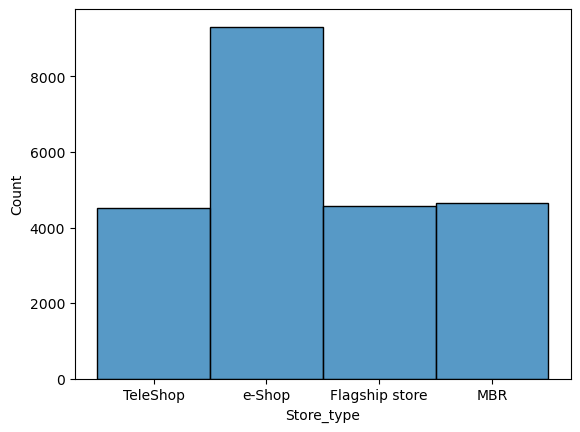

<Figure size 1400x800 with 0 Axes>

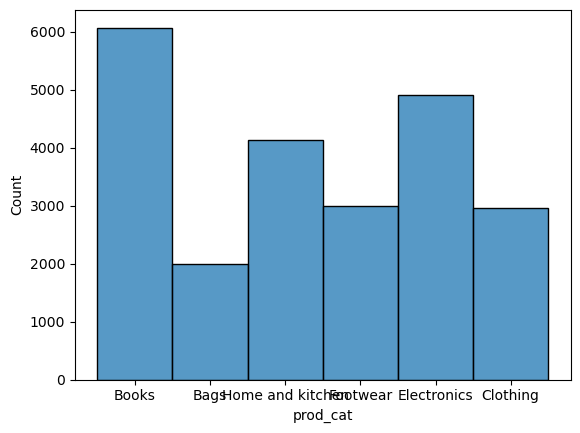

<Figure size 1400x800 with 0 Axes>

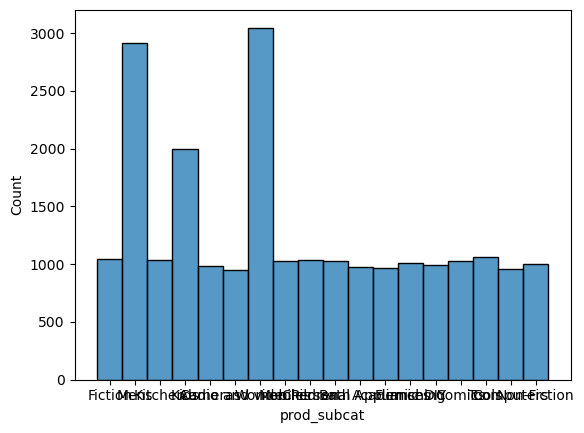

<Figure size 1400x800 with 0 Axes>

Gender         None
Store_type     None
prod_cat       None
prod_subcat    None
dtype: object

In [27]:
cat_var.apply(catvar)

### ***4. Calculate the following information using the merged dataset :***

***a. Time period of the available transaction data***

In [ ]:
ww = customer_final['tran_date'].max()
ww

In [ ]:
www = pd.Timestamp.strftime(ww , format = '%Y-%m-%d' )  
www


In [ ]:
ws = customer_final['tran_date'].min()
ws

In [ ]:
wws = pd.Timestamp.strftime(ws , format = '%Y-%m-%d' )
wws

In [ ]:
print('Time period of the available transaction data is '+ www  +  ' to '  +  wws)

****b. Count of transactions where the total amount of transaction was negative***

In [ ]:
customer_final[customer_final['total_amt'] < 0].shape[0]

### ***5. Analyze which product categories are more popular among females vs male customers.***

In [ ]:
qq = pd.DataFrame(customer_final.groupby(['Gender','prod_cat'])["Qty"].sum())

qq.reset_index()


###  ****6. Which City code has the maximum customers and what was the percentage of customers from that city?****

In [ ]:
city = pd.DataFrame(customer_final.groupby('city_code')['cust_id'].count()).reset_index().rename(columns = {'cust_id':'count'}).sort_values(by = 'count' , ascending = False )
city

### Percentage of customers from that city

In [ ]:
city.loc[ 3 , 'count'] / city['count'].sum() * 100

### ***7. Which store type sells the maximum products by value and by quantity?****

In [ ]:
customer_final.groupby('Store_type')[['Qty' , 'total_amt']].sum().sort_values(by = 'Qty' , ascending = False)

### ***8. What was the total amount earned from the "Electronics" and "Clothing" categories from Flagship Stores?***

In [ ]:
cc = pd.DataFrame(customer_final.groupby(['prod_cat','Store_type'])['total_amt'].sum()).reset_index()
cc

In [ ]:
ccc = cc.loc[8:16,['prod_cat','Store_type','total_amt']]
ccc


In [ ]:
ccc = ccc.pivot(index = 'prod_cat' , columns = 'Store_type' , values ='total_amt' )
ccc

In [ ]:
ccc.loc[['Clothing','Electronics'], 'Flagship store'].sum()

### ****9. What was the total amount earned from "Male" customers under the "Electronics" category?****


In [ ]:
ta = pd.DataFrame(customer_final.groupby(['Gender','prod_cat'])['total_amt'].sum()).reset_index()
ta

In [ ]:
taa = ta.loc[6 : , ['Gender','prod_cat','total_amt']]
taa

In [ ]:
taa.loc[ 9 : 9,'total_amt' ]

### **10. How many customers have more than 10 unique transactions, after removing all transactions which have any negative amounts?**

In [ ]:
new_data = customer_final.loc[customer_final['total_amt'] >0 , : : ]
new_data.head(2)

In [ ]:
st =  new_data.groupby('customer_Id')['transaction_id'].count()
st

In [ ]:
ut = pd.DataFrame(new_data.groupby(['customer_Id','prod_cat','prod_subcat'])['transaction_id'].count()).reset_index()
ut

In [ ]:
uta = ut.groupby('customer_Id')['transaction_id'].count()
uta

### 11. For all customers aged between 25 - 35, find out: 
### a. What was the total amount spent for “Electronics” and “Books” product categories?

In [ ]:
customer_final['age'] =customer_final['DOB'].apply(lambda x : pd.Timestamp.now().year - x.year)
customer_final['age'] 

In [ ]:
age_group = customer_final[(customer_final['age'] > 25) & (customer_final['age'] < 35 )]
age_group

In [ ]:
nda = pd.DataFrame(age_group.groupby('prod_cat')['total_amt'].sum()).reset_index()
nda

In [ ]:
Total_amt_spent = nda.total_amt[1] + nda.total_amt[3]
Total_amt_spent 

### ***b. What was the total amount spent by these customers between 1st Jan, 2014 to 1st Mar, 2014?***

In [ ]:
ag = pd.DataFrame(age_group[(age_group.tran_date > pd.to_datetime('01-01-2014' , format = '%d-%m-%Y')) & (age_group.tran_date < pd.to_datetime('01-03-2014' , format = '%d-%m-%Y'))].reset_index(drop=True))
ag.head(3)

In [ ]:
ag.total_amt.sum()

In [ ]:
customer_final.to_csv("C:\\Users\ifixthat\\Downloads\\Compressed\\Python RETAIL CASE STUDY\\Case Study 1 - Retail Case Study\\Retail_case_study.csv ")